# This code assesses the outputs of VESIcal compared to the VolatileCalc parameterization of the Dixon (1997) model.  
We compare saturation pressures for the major element compositions of melt inclusions from Bennett et al. (2019), and Sides et al. (2014a,b) with saturation pressures from VolatileCalc, and an excel macro used by Tucker et al. (2019).

In [1]:
import VESIcal as v
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import pandas as pd
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
plt.rcParams["font.family"] = 'arial'
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
%matplotlib inline
sns.set(style="ticks", context="poster",rc={"grid.linewidth": 1,"xtick.major.width": 1,"ytick.major.width": 1, 'patch.edgecolor': 'black'})

plt.style.use("seaborn-colorblind")
#jtplot.style()
mpl.rcParams['patch.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = 1 # set the value globally

In [3]:
myfile = v.ExcelFile('Bennet_et_al_2019_Sides_et_al_VolatileCalc.xlsx',  sheet_name=0, input_type='wtpercent')
data = myfile.data
data.tail()


,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,...,Total,NormSiO2,NormH2O,NormCO2,VolatileCalc_P,VolatileCalc_H2Ov mol% (norm),VolatileCalc_CO2vmol% (norm),DixonMacro_P,DixonMacro_XH2O,DixonMacro_XCO2
Label,,,,,,,,,,,,,,,,,,,,,
9,44.83,2.51,12.5,1.926665,0,9.826,0.177,13.78,0,0,...,100.519665,44.598239,0.0,4000.0,2715.625000,0.000000,100.002272,2671.5,-0.000004,1.000038
9,44.83,2.51,12.5,1.926665,0,9.826,0.177,13.78,0,0,...,100.219665,44.731740,0.5,0.0,29.946289,99.994986,0.000000,26.0,1.017889,0.000000
9,44.83,2.51,12.5,1.926665,0,9.826,0.177,13.78,0,0,...,100.319665,44.687151,1.0,0.0,115.742188,99.995689,0.000000,115.5,1.003878,0.000000
9,44.83,2.51,12.5,1.926665,0,9.826,0.177,13.78,0,0,...,100.419665,44.642651,1.5,0.0,270.898438,99.999507,0.000000,271.5,1.001317,0.000000
9,44.83,2.51,12.5,1.926665,0,9.826,0.177,13.78,0,0,...,100.519665,44.598239,2.0,0.0,486.523438,100.001382,0.000000,489.0,1.000136,0.000000


In [4]:
VolatileCalc_PSat=data['VolatileCalc_P']
DixonMacro_PSat=data['DixonMacro_P']

In [5]:
satPs_wtemps_Dixon= myfile.calculate_saturation_pressure(temperature="Temp", model='Dixon')

/home/jovyan/ThermoEngine/Notebooks/Development/Final_Model_Tests_Agree/VESIcal.py:3500: RuntimeWarning: Saturation pressure not found.
  warnings.warn("Saturation pressure not found.",RuntimeWarning)


In [6]:
satPs_wtemps_Dixon.head()

,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,...,NormCO2,VolatileCalc_P,VolatileCalc_H2Ov mol% (norm),VolatileCalc_CO2vmol% (norm),DixonMacro_P,DixonMacro_XH2O,DixonMacro_XCO2,SaturationP_bars_VESIcal,Model,Warnings
Label,,,,,,,,,,,,,,,,,,,,,
1,50.278940,1.130391,15.868951,0.929916,0,7.530168,0.0,8.055971,0,0,...,1953.080649,3687.500000,0.558484,99.442358,3682.0,0.004751,0.995312,3059.669063,Dixon,
2,49.611293,1.194805,14.819144,1.022711,0,8.281598,0.0,9.424541,0,0,...,1882.729456,3572.656250,0.417772,99.587986,3566.5,0.003490,0.996546,2999.862132,Dixon,
3,49.905929,1.158780,15.432440,0.958232,0,7.759462,0.0,8.897299,0,0,...,1983.815082,3734.375000,0.410999,99.598511,3728.5,0.003413,0.996740,3108.253985,Dixon,
10,47.723104,0.894812,17.842549,0.883467,0,7.154040,0.0,10.705108,0,0,...,93.574551,136.171875,2.026222,97.969581,136.0,0.013679,0.988764,203.308902,Dixon,
19,46.808720,1.087048,16.226818,1.306586,0,10.580330,0.0,10.042098,0,0,...,350.660566,401.171875,1.106493,98.889705,399.0,0.007866,0.993122,731.392565,Dixon,


# Comparison of VESIcal to VolatileCalc

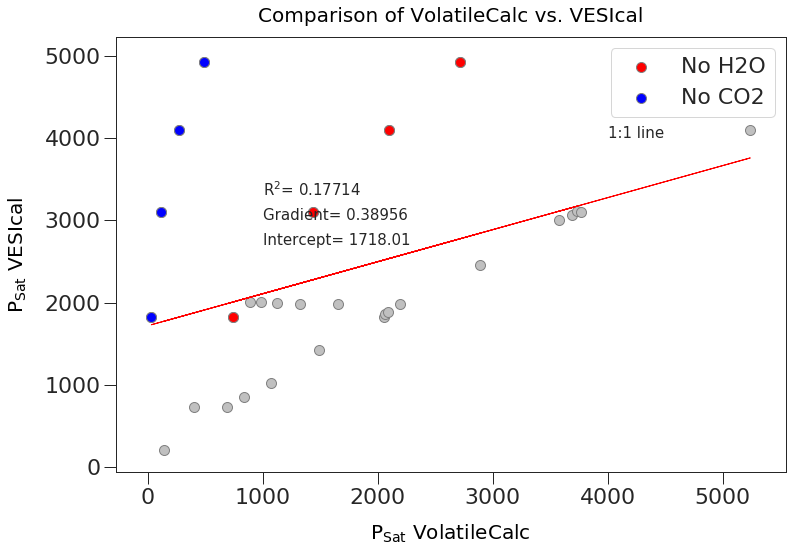

In [32]:
# Making linear regression
X=VolatileCalc_PSat
Y=satPs_wtemps_Dixon['SaturationP_bars_VESIcal']
mask = ~np.isnan(X) & ~np.isnan(Y)
X_noNan=X[mask].values.reshape(-1, 1)
Y_noNan=Y[mask].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_noNan,Y_noNan)
Y_pred=lr.predict(X_noNan)
#X - Y comparison of pressures
fig, ax1 = plt.subplots(figsize = (12,8)) # adjust dimensions of figure here
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('Comparison of VolatileCalc vs. VESIcal',
        fontdict= font, pad = 15)
plt.xlabel('P$_{Sat}$ VolatileCalc', fontdict=font, labelpad = 15)
plt.ylabel('P$_{Sat}$ VESIcal', fontdict=font, labelpad = 15)
plt.plot(X_noNan,Y_pred, color='red', linewidth=1)
plt.scatter(X_noNan, Y_noNan,  s=100, edgecolors='gray', facecolors='silver', marker='o')
plt.scatter(X[22:26], Y[22:26],  s=100, edgecolors='gray', facecolors='red', marker='o', label = 'No H2O')
plt.scatter(X[26:30], Y[26:30],  s=100, edgecolors='gray', facecolors='blue', marker='o', label = 'No CO2')



#plt.plot([0, 4000], [0, 4000])
I='Intercept= ' + str(np.round(lr.intercept_, 3))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 5))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_noNan, Y_pred), 5)) 
#one='1:1 line'
plt.text(1000, 2700, I, fontsize=15)
plt.text(1000, 3000, G, fontsize=15)
plt.text(1000, 3300, R, fontsize=15)
plt.text(4000, 4000, one, fontsize=15)
plt.legend()

# The SiO2 content correlates with the discrepency

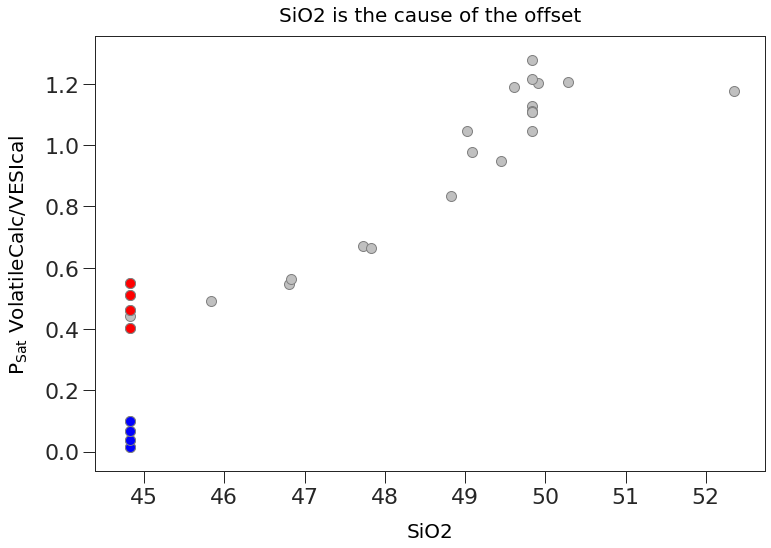

In [40]:
X=VolatileCalc_PSat
Y=satPs_wtemps_Dixon['SaturationP_bars_VESIcal']
testvariable=data['SiO2']
fig, ax1 = plt.subplots(figsize = (12,8)) # adjust dimensions of figure here
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('SiO2 is the cause of the offset',
        fontdict= font, pad = 15)
plt.xlabel('SiO2', fontdict=font, labelpad = 15)
plt.ylabel('P$_{Sat}$ VolatileCalc/VESIcal', fontdict=font, labelpad = 15)
plt.scatter(testvariable, X/Y,  s=100, edgecolors='gray', facecolors='silver', marker='o', label = 'Eguchi')
plt.scatter(testvariable[22:26], X[22:26]/Y[22:26],  s=100, edgecolors='gray', facecolors='red', marker='o', label = 'No H2O')
plt.scatter(testvariable[26:30], X[26:30]/Y[26:30],  s=100, edgecolors='gray', facecolors='blue', marker='o', label = 'No CO2')

# Comparing VESIcal with Dixon Macro

In [10]:
X=DixonMacro_PSat
Y=satPs_wtemps_Dixon['SaturationP_bars_VESIcal']
mask = ~np.isnan(X) & ~np.isnan(Y)
X_noNan=X[mask].values.reshape(-1, 1)
Y_noNan=Y[mask].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_noNan,Y_noNan)
Y_pred=lr.predict(X_noNan)

Text(4000, 4000, '1:1 line')

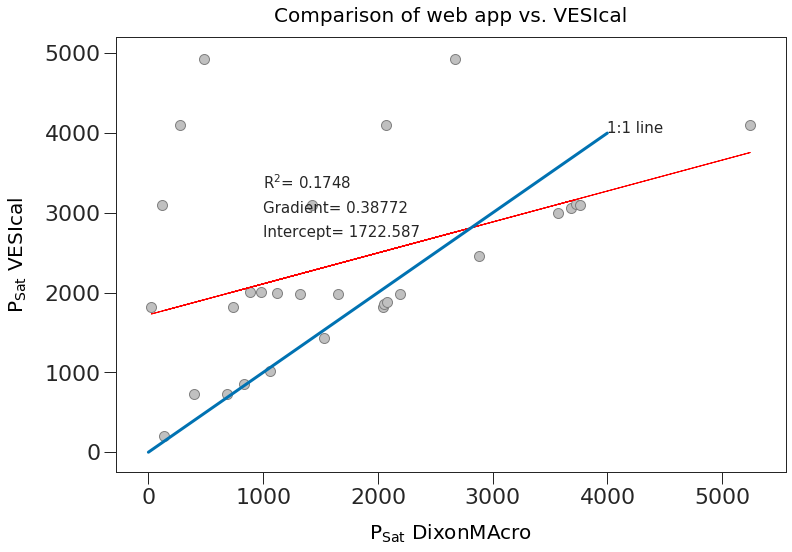

In [11]:
fig, ax1 = plt.subplots(figsize = (12,8)) # adjust dimensions of figure here
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('Comparison of web app vs. VESIcal',
        fontdict= font, pad = 15)
plt.xlabel('P$_{Sat}$ DixonMAcro', fontdict=font, labelpad = 15)
plt.ylabel('P$_{Sat}$ VESIcal', fontdict=font, labelpad = 15)
plt.plot(X_noNan,Y_pred, color='red', linewidth=1)
plt.scatter(X_noNan, Y_noNan,  s=100, edgecolors='gray', facecolors='silver', marker='o', label = 'Eguchi')
plt.plot([0, 4000], [0, 4000])
I='Intercept= ' + str(np.round(lr.intercept_, 3))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 5))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_noNan, Y_pred), 5)) 
one='1:1 line'
plt.text(1000, 2700, I, fontsize=15)
plt.text(1000, 3000, G, fontsize=15)
plt.text(1000, 3300, R, fontsize=15)
plt.text(4000, 4000, one, fontsize=15)

# Comparison of Dixon Macro and VolatileCalc

In [12]:
X=DixonMacro_PSat
Y=VolatileCalc_PSat
mask = ~np.isnan(X) & ~np.isnan(Y)
X_noNan=X[mask].values.reshape(-1, 1)
Y_noNan=Y[mask].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_noNan,Y_noNan)
Y_pred=lr.predict(X_noNan)


Text(4000, 4000, '1:1 line')

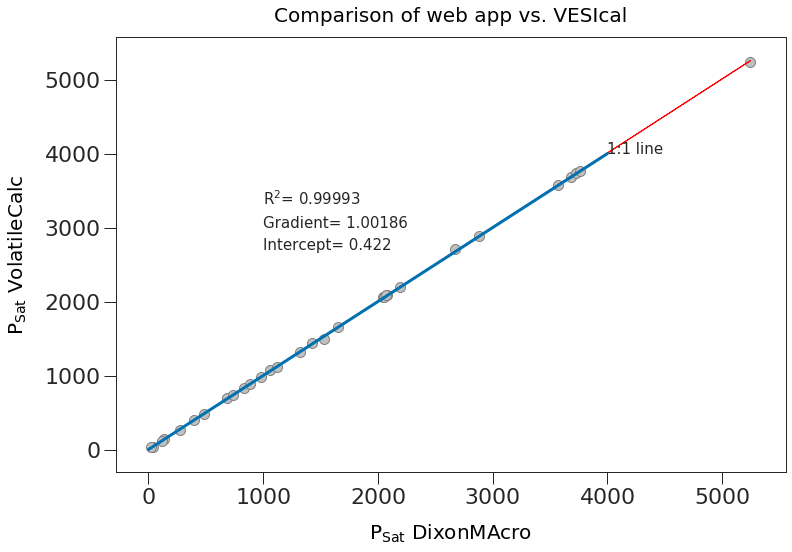

In [13]:
fig, ax1 = plt.subplots(figsize = (12,8)) # adjust dimensions of figure here
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('Comparison of web app vs. VESIcal',
        fontdict= font, pad = 15)
plt.xlabel('P$_{Sat}$ DixonMAcro', fontdict=font, labelpad = 15)
plt.ylabel('P$_{Sat}$ VolatileCalc', fontdict=font, labelpad = 15)
plt.plot(X_noNan,Y_pred, color='red', linewidth=1)
plt.scatter(X_noNan, Y_noNan,  s=100, edgecolors='gray', facecolors='silver', marker='o', label = 'Eguchi')
plt.plot([0, 4000], [0, 4000])
I='Intercept= ' + str(np.round(lr.intercept_, 3))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 5))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_noNan, Y_pred), 5)) 
one='1:1 line'
plt.text(1000, 2700, I, fontsize=15)
plt.text(1000, 3000, G, fontsize=15)
plt.text(1000, 3300, R, fontsize=15)
plt.text(4000, 4000, one, fontsize=15)

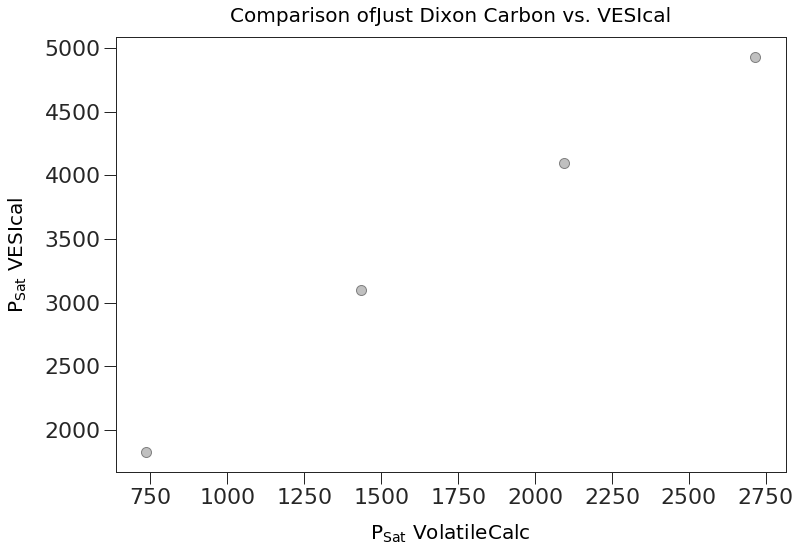

In [16]:
# Is it better if I use just dixon carbo
satPs_wtemps_DixonCarbon= myfile.calculate_saturation_pressure(temperature="Temp", model='DixonCarbon')
YShort=satPs_wtemps_DixonCarbon['SaturationP_bars_VESIcal'].iloc[22:26] # These are dry ones with same composition
XShort=VolatileCalc_PSat.iloc[22:26] # These are dry ones
fig, ax1 = plt.subplots(figsize = (12,8)) # adjust dimensions of figure here
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('Comparison ofJust Dixon Carbon vs. VESIcal',
        fontdict= font, pad = 15)
plt.xlabel('P$_{Sat}$ VolatileCalc', fontdict=font, labelpad = 15)
plt.ylabel('P$_{Sat}$ VESIcal', fontdict=font, labelpad = 15)

plt.scatter(XShort, YShort,  s=100, edgecolors='gray', facecolors='silver', marker='o', label = 'Eguchi')


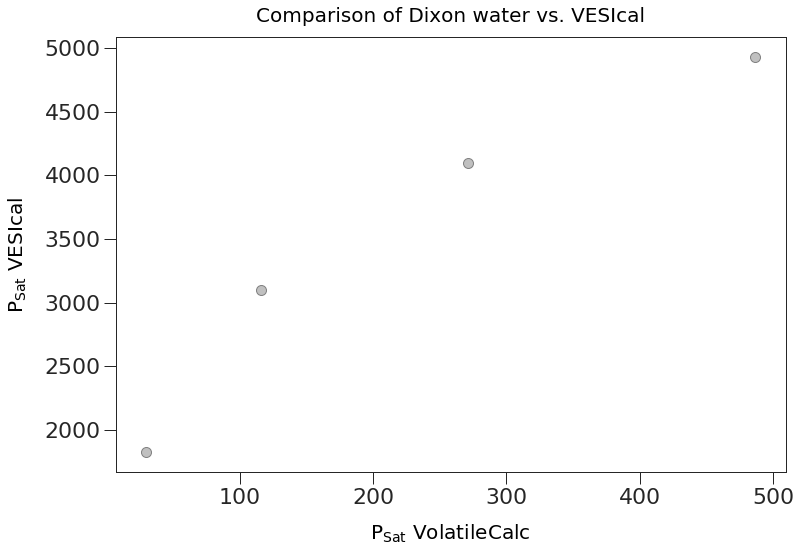

In [23]:
# What about just Dixon H2O

satPs_wtemps_DixonWater= myfile.calculate_saturation_pressure(temperature="Temp", model='Water')
YShort=satPs_wtemps_DixonCarbon['SaturationP_bars_VESIcal'].iloc[26:30]
XShort=VolatileCalc_PSat.iloc[26:30] # These are dry ones
fig, ax1 = plt.subplots(figsize = (12,8)) # adjust dimensions of figure here
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('Comparison of Dixon water vs. VESIcal',
        fontdict= font, pad = 15)
plt.xlabel('P$_{Sat}$ VolatileCalc', fontdict=font, labelpad = 15)
plt.ylabel('P$_{Sat}$ VESIcal', fontdict=font, labelpad = 15)

plt.scatter(XShort, YShort,  s=100, edgecolors='gray', facecolors='silver', marker='o')

In [ ]:
myfile.save_excelfile(filename='DixonTesting2.xlsx', calculations=[satPs_wtemps_Dixon], sheet_name=['web'])